<a href="https://www.analytiksinc.com">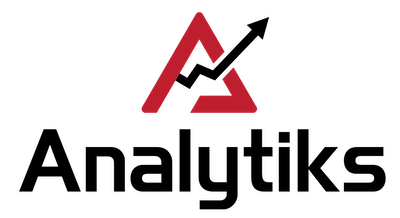</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# EXERCISE: Clustering Insurance Leads with Survey Results

Consider that you’re a marketing manager at an insurance firm and that you want to customize your offerings to suit the needs of your customers. You’ve decided to try out customer profiling and segmentation. After much thought, you decide on the two factors that you think the customers would value the most. Those are:
* A savings on premium paid
* The local availability of nearby insurance agents <br><br>

The importance of these factors will be measured using something called the “likert scale”, wherein a rating of 1 represents not important and a rating of 7 represent very important. 
You conduct the survey with 150 respondents.  The survey results are in a CSV file called “Survey Results.csv”
1. How many segments would you create?
2. Describe each segment you create in terms of the input variables
3. How would you target each customer segment?


## Import the Necessary Libraries

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

%matplotlib inline

## Load and Explore the Dataset

The file we'll be working with is called "Survey Results.csv"

In [7]:
df=pd.read_csv('Survey Results.csv')
df.head()

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


In [6]:
df.describe()

,Premium Savings very important,Agent Not Important
count,150.000000,150.000000
mean,4.093333,4.046667
std,1.918986,2.014500
min,1.000000,1.000000
25%,3.000000,2.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,7.000000,7.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
Premium Savings very important    150 non-null int64
Agent Not Important               150 non-null int64
dtypes: int64(2)
memory usage: 2.4 KB


## Train a Clustering Model

In [11]:
sse = []

for x in range (1,11):
    km=KMeans(n_clusters=x)
    km.fit(df)
    sse.append(km.inertia_)

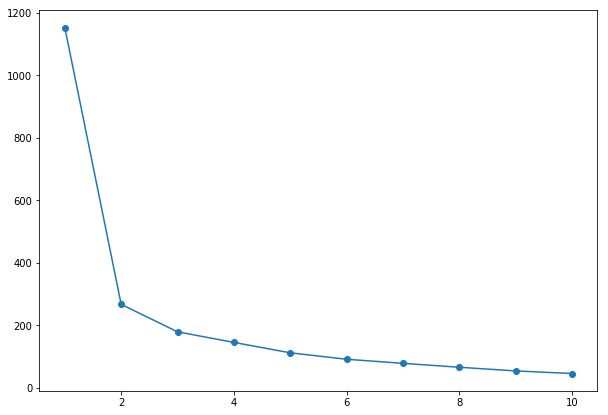

In [12]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11), sse, marker = 'o')

In [28]:
km=KMeans(n_clusters=2)
y_means=km.fit_predict(df)

In [29]:
df_res = df.copy()
df_res['Label']=y_means

In [30]:
df_res.head()

,Premium Savings very important,Agent Not Important,Label
0,5,5,0
1,6,7,0
2,6,5,0
3,6,6,0
4,5,6,0


## Visualize the Results

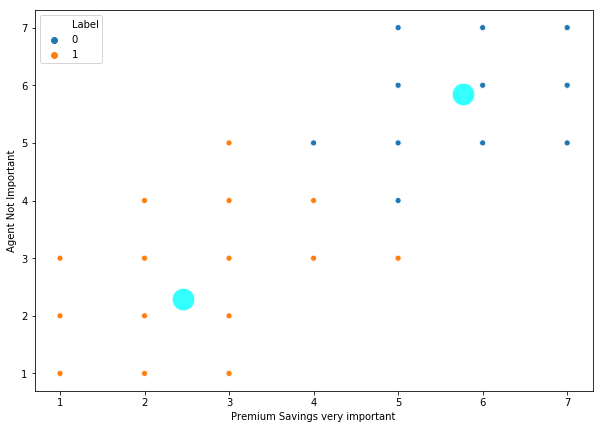

In [31]:
#Visualizing the clusters for k=5

#Set a color palette
# bright_colors = sns.color_palette("GnBu", 5)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_res['Premium Savings very important'], y=df_res['Agent Not Important'], hue=df_res.Label)

# #Add on the cluster centers
centers = km.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

In [34]:
range_n_clusters= [2,3,4,5,6,7,8,9,10]

For n_clusters = 2 The average silhouette_score is : 0.6450368299887457
For n_clusters = 3 The average silhouette_score is : 0.5091672245491061
For n_clusters = 4 The average silhouette_score is : 0.4115023361984005
For n_clusters = 5 The average silhouette_score is : 0.42196418498497834
For n_clusters = 6 The average silhouette_score is : 0.44548800997192556
For n_clusters = 7 The average silhouette_score is : 0.4814792912278525
For n_clusters = 8 The average silhouette_score is : 0.4924760984921401
For n_clusters = 9 The average silhouette_score is : 0.5139616507133073
For n_clusters = 10 The average silhouette_score is : 0.5491218492060607


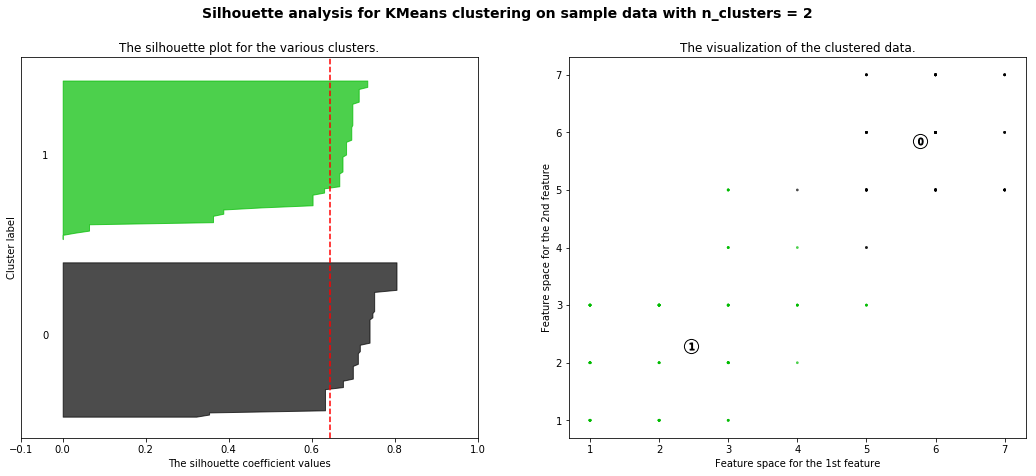

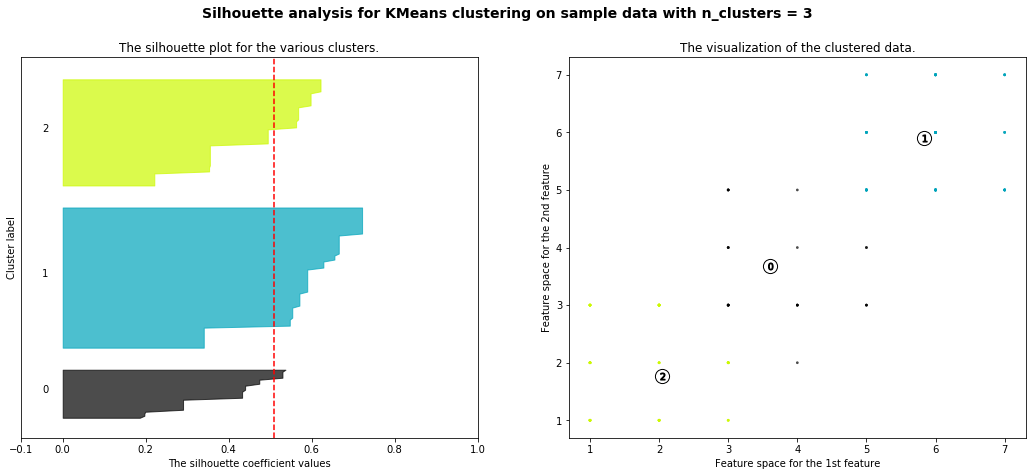

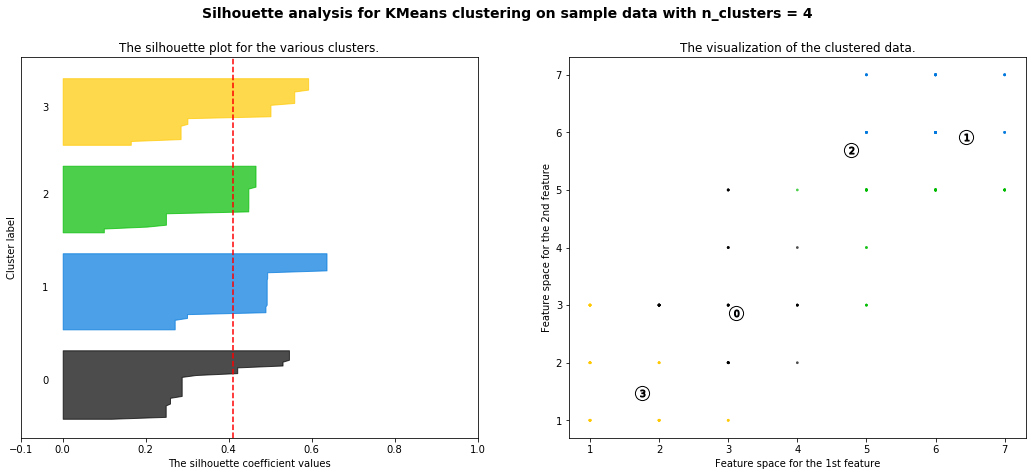

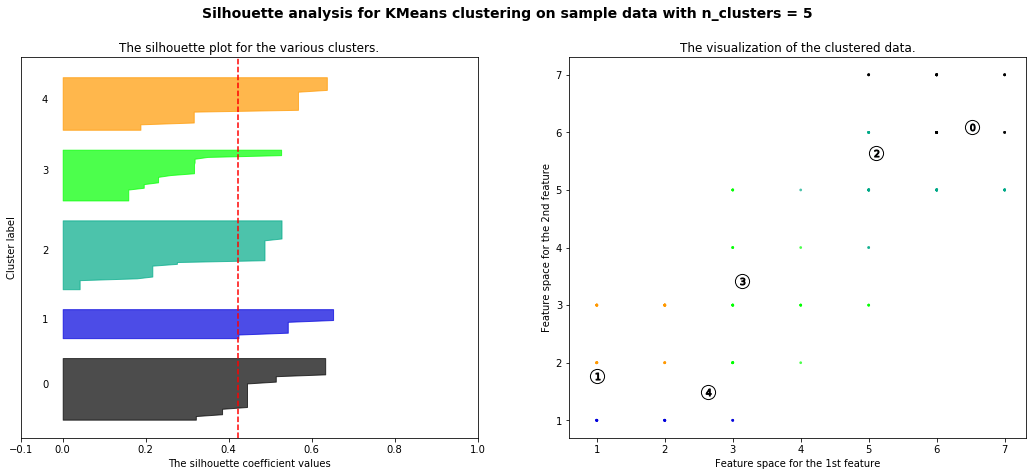

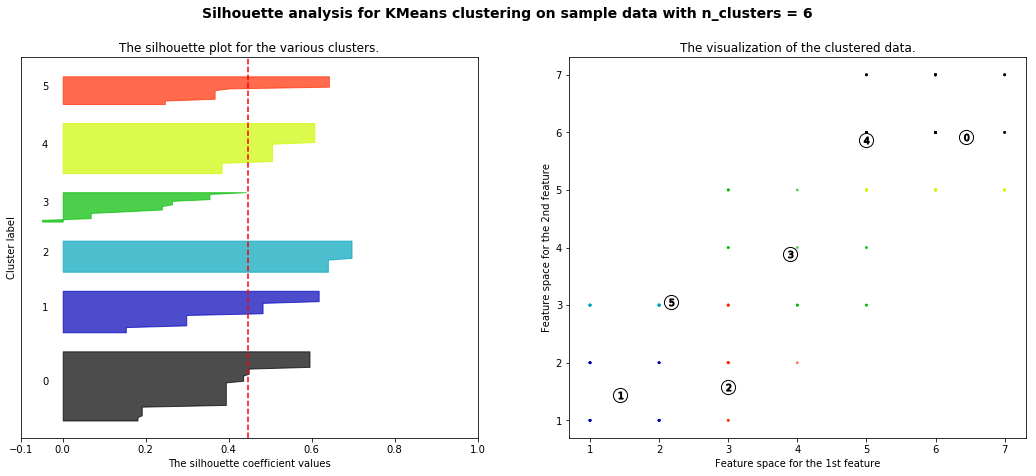

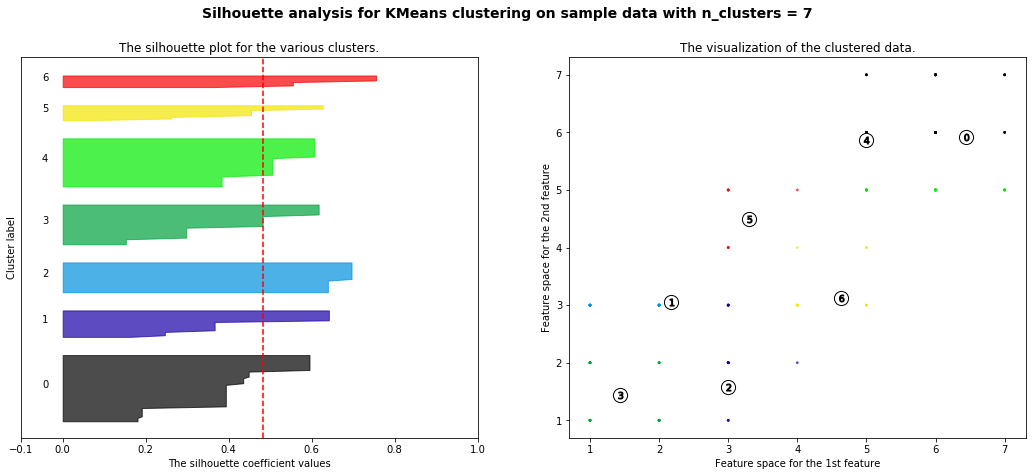

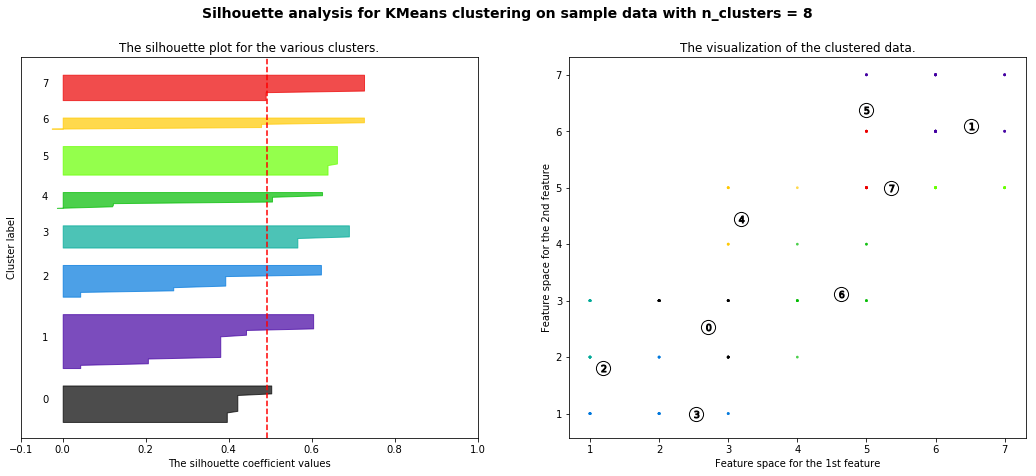

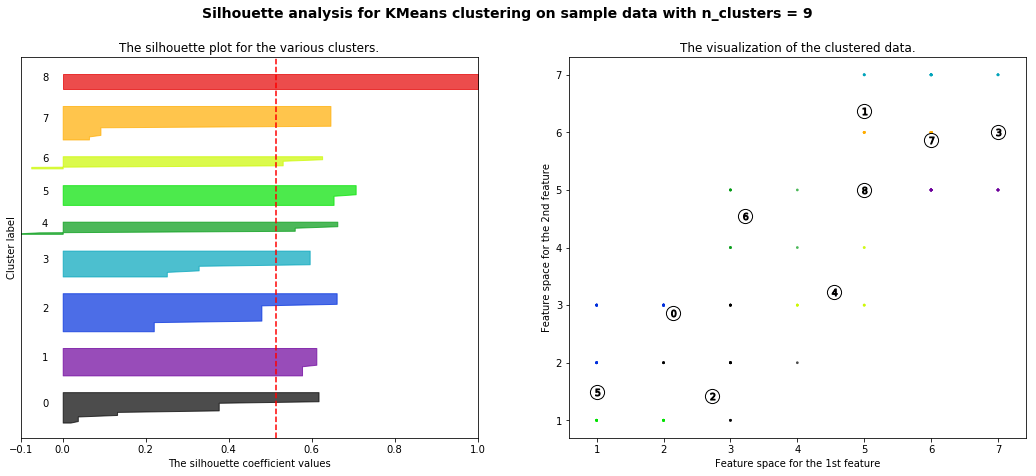

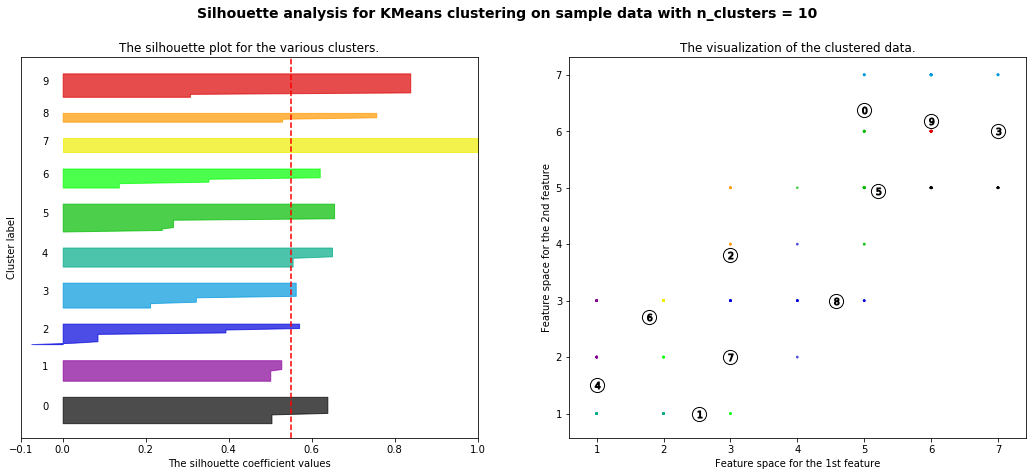

In [38]:
## Change all "X" variables to df; All changes from the original code can be found after the ###---### comments.

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ### --- ###
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    
    ### --- ###
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    ### --- ###
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    ### --- ###
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ### --- ### 
    ax2.scatter(df['Agent Not Important'], df['Premium Savings very important'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Analyze the Clusters

There are 2 clusters those who find agents and premium savings not very important and those who find agents and premium savings very important.

## How would you target the Clusters?

Segment 0: Focus on creating products that focuses on savings earned from premiums. These may be the financial savvy people
Segment 1: Focus on having a relationship manager for them and earn back money by giving less efficient product